# Lottery Dataset

## Cleaning the data

First, we import the packages we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Second, we import the actual dataset. The dataset comes from a txt-file which has uneven spaces between columns and a comment at the beginning. We use an argumet 'skiprows = 4' to remove the comment. 

In [2]:
data = pd.read_csv('LotteryData2.txt', sep = " ", skiprows = 4, header = None)

In [3]:
print(data.shape)

(1391, 74)


We see that the dimensions of the dataset has correct number of rows (514), however the number of columns is incorrect due to uneven number of spaces in the original file. We look at the data and see that some columns have NaN values: 

In [4]:
print(data.head())

     0   1   2   3   4     5    6    7     8   9  ...  64  65  66  67  68  69  \
0  1391 NaN NaN NaN NaN  Fri.  Oct  19,  2018 NaN ... NaN NaN NaN NaN   7 NaN   
1  1390 NaN NaN NaN NaN  Tue.  Oct  16,  2018 NaN ... NaN NaN NaN NaN   9 NaN   
2  1389 NaN NaN NaN NaN  Fri.  Oct  12,  2018 NaN ... NaN NaN NaN NaN   7 NaN   
3  1388 NaN NaN NaN NaN  Tue.  Oct  09,  2018 NaN ... NaN NaN NaN NaN  18 NaN   
4  1387 NaN NaN NaN NaN  Fri.  Oct  05,  2018 NaN ... NaN NaN NaN NaN  12 NaN   

   70  71  72  73  
0 NaN NaN NaN NaN  
1 NaN NaN NaN NaN  
2 NaN NaN NaN NaN  
3 NaN NaN NaN NaN  
4 NaN NaN NaN NaN  

[5 rows x 74 columns]


We remove columns with NaNs using .dropna() method. 

In [5]:
data = data.dropna(axis = 1, how = 'all')
print(data.head())
print(data.shape)

     0     5    6    7     8   18  28  38  48  58  68
0  1391  Fri.  Oct  19,  2018  65  53  23  15  70   7
1  1390  Tue.  Oct  16,  2018  69  45  61   3  49   9
2  1389  Fri.  Oct  12,  2018  70  24  46   4  61   7
3  1388  Tue.  Oct  09,  2018  54  22  39  20  60  18
4  1387  Fri.  Oct  05,  2018  41  32  27  69  28  12
(1391, 11)


In [6]:
data.columns = ['Draw','WeekDay', 'Month', 'Day', 'Year', '1', '2', '3', '4', '5', 'Mega']

In [7]:
print(data.head())

   Draw WeekDay Month  Day  Year   1   2   3   4   5  Mega
0  1391    Fri.   Oct  19,  2018  65  53  23  15  70     7
1  1390    Tue.   Oct  16,  2018  69  45  61   3  49     9
2  1389    Fri.   Oct  12,  2018  70  24  46   4  61     7
3  1388    Tue.   Oct  09,  2018  54  22  39  20  60    18
4  1387    Fri.   Oct  05,  2018  41  32  27  69  28    12


In [8]:
data['Day'] = data['Day'].apply(lambda x: str(x).rstrip(','))
print(data.head())

   Draw WeekDay Month Day  Year   1   2   3   4   5  Mega
0  1391    Fri.   Oct  19  2018  65  53  23  15  70     7
1  1390    Tue.   Oct  16  2018  69  45  61   3  49     9
2  1389    Fri.   Oct  12  2018  70  24  46   4  61     7
3  1388    Tue.   Oct  09  2018  54  22  39  20  60    18
4  1387    Fri.   Oct  05  2018  41  32  27  69  28    12


In [9]:
from time import strptime
data['Month'] = data['Month'].apply(lambda x: strptime(x,'%b').tm_mon)


In [10]:
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], format = '%Y%M%D')
data = data.drop(['Year', 'Month', 'Day'], axis =1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 9 columns):
Draw       1391 non-null int64
WeekDay    1391 non-null object
1          1391 non-null int64
2          1391 non-null int64
3          1391 non-null int64
4          1391 non-null int64
5          1391 non-null int64
Mega       1391 non-null int64
Date       1391 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 97.9+ KB
None


In [11]:
data = data[['Draw','Date', '1', '2', '3', '4', '5', 'Mega']]
print(data.head())

   Draw       Date   1   2   3   4   5  Mega
0  1391 2018-10-19  65  53  23  15  70     7
1  1390 2018-10-16  69  45  61   3  49     9
2  1389 2018-10-12  70  24  46   4  61     7
3  1388 2018-10-09  54  22  39  20  60    18
4  1387 2018-10-05  41  32  27  69  28    12


The data is clean. 
However the lottery rules change:
- the Powerball data on Oct 7, 2015. 
- the Mega Millions on Oct 31, 2017.
So we need to remove all the data prior to this time. 

In [12]:
data_s = data[data['Date'] >= '2017-10-31'] #
data_s = data_s.set_index('Date')

In [13]:
data_s[[ '1', '2', '3', '4', '5']] = data_s[[ '1', '2', '3', '4', '5']].apply(np.sort, axis = 1) 
print(data_s.head())

            Draw   1   2   3   4   5  Mega
Date                                      
2018-10-19  1391  15  23  53  65  70     7
2018-10-16  1390   3  45  49  61  69     9
2018-10-12  1389   4  24  46  61  70     7
2018-10-09  1388  20  22  39  54  60    18
2018-10-05  1387  27  28  32  41  69    12


# Analyzing the data

First we plot the histogram of all Mega balls

In [14]:
frequency_Mega = data_s.Mega.value_counts()
print(frequency_Mega)

22    7
9     7
1     6
20    6
11    6
23    5
2     5
3     5
17    5
14    5
12    4
7     4
10    4
13    4
24    4
19    4
16    3
8     3
4     3
25    3
15    2
18    2
6     2
21    2
5     1
Name: Mega, dtype: int64


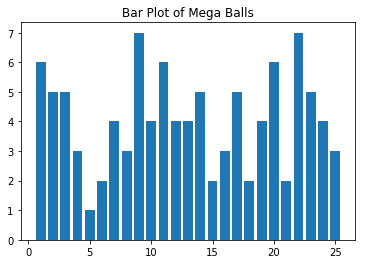

In [107]:
keys = []
values = []
for key, value in frequency_Mega.iteritems():
    keys.append(key)
    values.append(value)
plt.bar(keys, values)
plt.title('Bar Plot of Mega Balls')
plt.show()

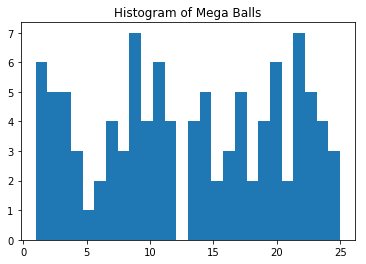

In [108]:
plt.hist(data_s.Mega, bins=26)
plt.title('Histogram of Mega Balls')
plt.show()

In [105]:
balls = data_s[['1', '2', '3', '4', '5']].values.flatten()
unique, counts = np.unique(balls, return_counts=True)
percentages = counts/counts.sum() 
perc_cumsum = np.cumsum(percentages)


#print(np.asarray((unique, counts)).T)

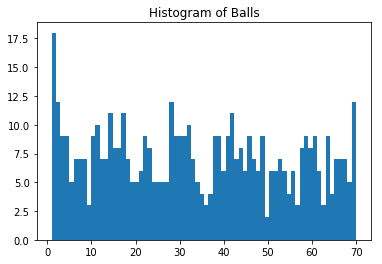

In [109]:
plt.hist(balls, bins = 70)
plt.title('Histogram of Balls')
plt.show()

No handles with labels found to put in legend.


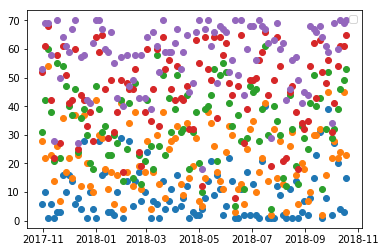

In [106]:
plt.plot(data_s[['1', '2', '3', '4', '5']],linestyle="",marker="o")
plt.show()

# Code to generate lottery numbers

In [ ]:
from random import random

def lottery_generate (previous_data = data_s):
    balls = previous_data[['1', '2', '3', '4', '5']].values.flatten()
    
    unique, counts = np.unique(balls, return_counts=True)

    list_numbers = []
    for iteration in range(5):
        percentages = counts/counts.sum() 
        perc_cumsum = np.cumsum(percentages)
        # Generate a random number from uniform:
        rand_unif = random()
        # Finding an index and the number itself from our discrete distribution
        index = np.where(perc_cumsum < rand_unif)[0][-1] +1
        number = unique[index]
        list_numbers.append(number)
        # removing the previuous number from counts
        counts = np.delete(counts, index)
        unique = np.delete(unique, index)
    
    list_numbers.sort()
    
    unique, counts = np.unique(data_s.Mega.values, return_counts=True)
    percentages = counts/counts.sum() 
    perc_cumsum = np.cumsum(percentages)
    # Generate a random number from uniform:
    rand_unif = random()
    # Finding an index and the number itself from our discrete distribution
    index = np.where(perc_cumsum < rand_unif)[0][-1] +1
    megaball = unique[index]
        
    return [list_numbers, megaball]

In [ ]:
print(lottery_generate())